Uber Fare Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from math import *

In [2]:
df = pd.read_csv("Downloads/uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [5]:
df = df.drop(['Unnamed: 0','key'], axis = 1)

In [6]:
df.shape

(200000, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [8]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [9]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [12]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [13]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
              day = df.pickup_datetime.dt.day,
              month = df.pickup_datetime.dt.month, 
              year = df.pickup_datetime.dt.year, 
              dayofweek = df.pickup_datetime.dt.dayofweek)

In [14]:
def distance_calc(longitude1, latitude1, longitude2, latitude2):
    #distance formula
    travel = []
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel.append(c)
    return travel

In [15]:
df['distance'] = distance_calc(df['pickup_longitude'].to_numpy(),
                                                df['pickup_latitude'].to_numpy(),
                                                df['dropoff_longitude'].to_numpy(),
                                                df['dropoff_latitude'].to_numpy()
                                              )
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3,4.475450


In [16]:
df = df.drop('pickup_datetime',axis=1)

In [17]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,distance
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,13.491387,15.704739,6.281791,2011.742434,3.048435,20.855350
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,6.515505,8.687377,3.438933,1.856400,1.946946,382.964642
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,8.000000,3.000000,2010.000000,1.000000,1.215222
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,16.000000,6.000000,2012.000000,3.000000,2.120992
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,19.000000,23.000000,9.000000,2013.000000,5.000000,3.875169
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,31.000000,12.000000,2015.000000,6.000000,16409.239135


In [18]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
distance             0
dtype: int64

In [19]:
df.drop(df.index[df['distance'] == 0.0], inplace=True)

<AxesSubplot: >

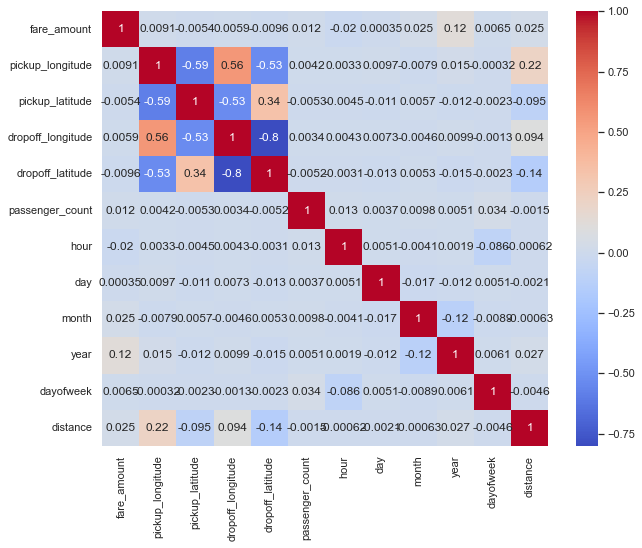

In [20]:
plt.figure(figsize=(10,8))
sn.set()
df1 = df.corr()
sn.heatmap (data = df1, annot = True, cmap = 'coolwarm')

<AxesSubplot: xlabel='passenger_count', ylabel='fare_amount'>

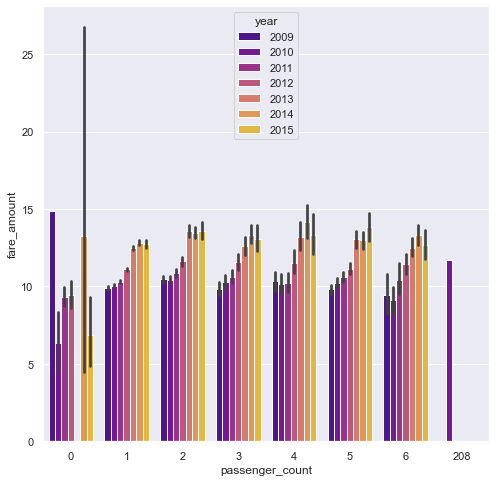

In [21]:
plt.figure(figsize=(8,8))
sn.barplot(x ='passenger_count', y ='fare_amount', data = df, palette ='plasma', hue = 'year')

<AxesSubplot: xlabel='hour', ylabel='count'>

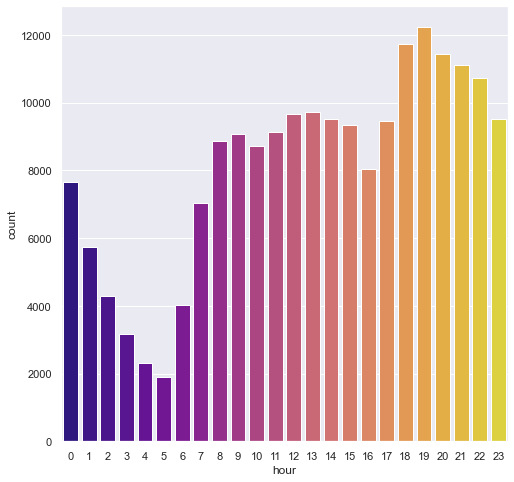

In [22]:
plt.figure(figsize=(8,8))
sn.countplot(x=df['hour'], data=df['dayofweek'], palette ='plasma')

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [24]:
X=df.drop(['fare_amount'],axis=1)
y=df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

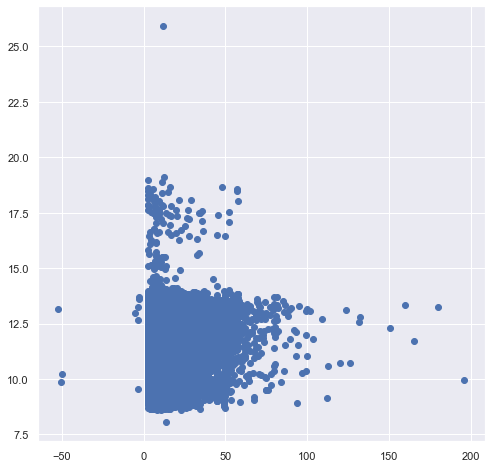

In [26]:
sn.set(rc = {'figure.figsize':(8,8)})
plt.scatter(y_test, predictions)

C:\Users\manav\AppData\Local\Temp\ipykernel_25816\2441256555.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sn.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\manav\AppData\Local\Temp\ipykernel_25816\2441256555.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distp

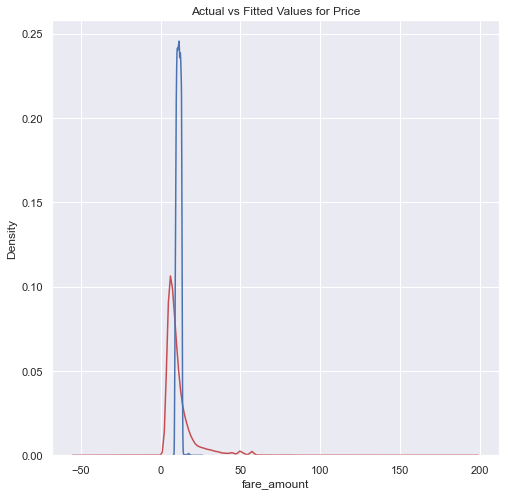

In [27]:
ax = sn.distplot(y_test, hist=False, color="r", label="Actual Value")
sn.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.show()

In [28]:
from sklearn import metrics

In [29]:
print ("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE:  9.522215041756892


In [30]:
clf= RandomForestRegressor(n_estimators=150)
clf.fit(X_train,y_train)
pred= clf.predict(X_test)

C:\Users\manav\AppData\Local\Temp\ipykernel_25816\1942902526.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sn.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\manav\AppData\Local\Temp\ipykernel_25816\1942902526.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distp

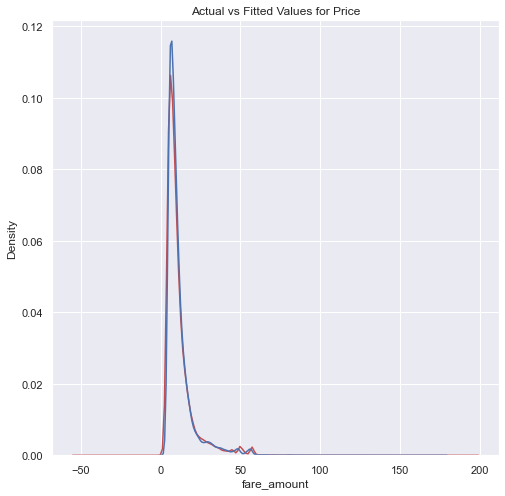

In [31]:
ax = sn.distplot(y_test, hist=False, color="r", label="Actual Value")
sn.distplot(pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.show()

In [32]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

RMSE: 3.8599721071133857
